In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [24]:
import os

def get_filenames(folder_path):
    filenames = []
    for filename in os.listdir(folder_path):
        if os.path.isfile(os.path.join(folder_path, filename)):
            filenames.append(filename)
    return filenames

# 使用示例
folder_path = 'motion_data/'  # 替换成你的文件夹路径
file_list = get_filenames(folder_path)

file_list.sort()
file_list

['3_time_jumps.txt']

In [25]:
import os

def read_files_to_dataframes(folder_path):
    dataframes = {}
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            # 读取CSV文件
            df = pd.read_csv(file_path, sep='\t')
            data = pd.DataFrame()
            data[['acc_X(g)', 'acc_Y(g)', 'acc_Z(g)', 'ang_X(g)', 'ang_Y(g)', 'ang_Z(g)', 'Time']] = df[['加速度X(g)', '加速度Y(g)', '加速度Z(g)',
                                                                     '角速度X(°/s)', '角速度Y(°/s)','角速度Z(°/s)', '时间']]
            data['Time'] = pd.to_datetime(data['Time'], format='%Y-%m-%d %H:%M:%S:%f')
            # 将DataFrame存储在以文件名为键的字典中
            dataframes[filename] = data
    return dataframes

# 使用示例
folder_path = 'motion_data'  # 替换成你的文件夹路径
dfs = read_files_to_dataframes(folder_path)

# 打印每个DataFrame的信息（可选）
for filename, df in dfs.items():
    filename = filename[0:12]
    print(f"Data from {filename}:")
    print(df.head())  # 打印每个DataFrame的前几行


Data from 3_time_jumps:
   acc_X(g)  acc_Y(g)  acc_Z(g)  ang_X(g)  ang_Y(g)  ang_Z(g)  \
0    -0.678     0.365     0.646     0.488     0.000    -1.160   
1    -0.678     0.365     0.646     0.488     0.000    -1.160   
2    -0.688     0.354     0.650     1.099    -0.305    -1.343   
3    -0.688     0.354     0.650     1.099    -0.305    -1.343   
4    -0.670     0.356     0.642     1.770    -0.183    -1.343   

                     Time  
0 2024-01-16 21:15:37.867  
1 2024-01-16 21:15:37.867  
2 2024-01-16 21:15:37.997  
3 2024-01-16 21:15:37.997  
4 2024-01-16 21:15:38.710  


Plotting data from 3_time_jumps.txt...
Plotting data from 3_time_jumps.txt...
Plotting data from 3_time_jumps.txt...
Plotting data from 3_time_jumps.txt...


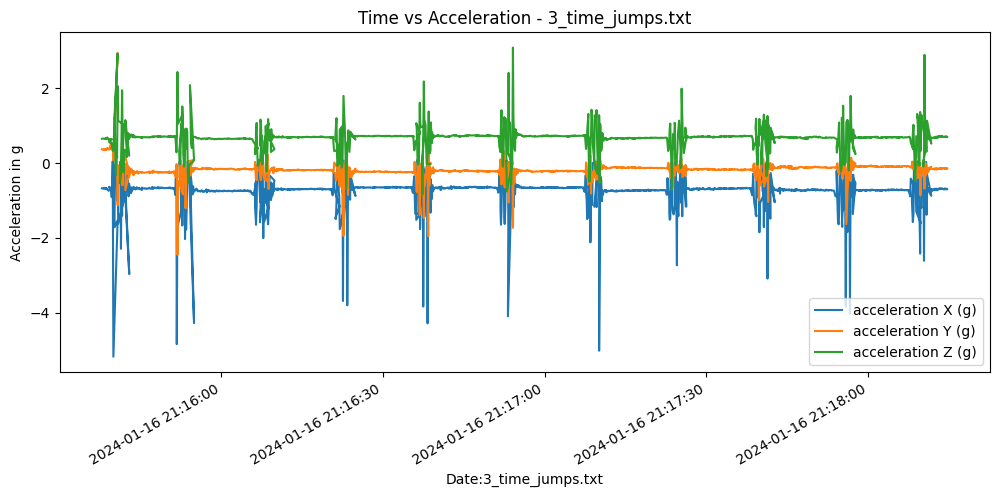

In [26]:

for filename, df in dfs.items():
    

    print(f"Plotting data from {filename}...")

    plt.figure(figsize=(12, 5))

    print(f"Plotting data from {filename}...")

    # 绘制每个加速度分量

    plt.plot(df['Time'], df['acc_X(g)'], label='acceleration X (g)')
    plt.plot(df['Time'], df['acc_Y(g)'], label='acceleration Y (g)')
    plt.plot(df['Time'], df['acc_Z(g)'], label='acceleration Z (g)')
    #plt.plot(df['Time'], df['ang_X(g)'], label='angular_velocity X (g)')
    #plt.plot(df['Time'], df['ang_Y(g)'], label='angular_velocity Y (g)')
    #plt.plot(df['Time'], df['ang_Z(g)'], label='angular_velocity Z (g)')

    print(f"Plotting data from {filename}...")

    # 格式化图表
    plt.xlabel('Date:' + filename)
    plt.ylabel('Acceleration in g')
    plt.title(f'Time vs Acceleration - {filename}')
    plt.legend()
    plt.grid(False)

    print(f"Plotting data from {filename}...")

    # 改进日期格式化
    plt.gcf().autofmt_xdate()
    myFmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
    plt.gca().xaxis.set_major_formatter(myFmt)

    plt.show()


### K-means

In [27]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans
from sklearn.preprocessing import StandardScaler


In [28]:
# 选择加速度数据
acceleration_data = dfs['3_time_jumps.txt'][['acc_X(g)', 'acc_Y(g)', 'acc_Z(g)']]

# 数据预处理：标准化
scaler = StandardScaler()
scaled_data = scaler.fit_transform(acceleration_data)

In [29]:
# 时间序列数据通常需要特定的预处理
# 这里我们使用 TimeSeriesScalerMeanVariance 将时间序列标准化为平均值为0，方差为1
scaled_data = TimeSeriesScalerMeanVariance().fit_transform(scaled_data.reshape(scaled_data.shape[0], scaled_data.shape[1], 1))

In [30]:
# 使用 K-均值聚类
n_clusters = 2  # 假设我们希望将数据分成 2 类
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", max_iter=10)

In [31]:
# 训练模型
model.fit(scaled_data)

TimeSeriesKMeans(max_iter=10, n_clusters=2)

In [32]:
# 预测聚类标签
labels = model.predict(scaled_data)

# 将聚类结果添加到原始 DataFrame
dfs['3_time_jumps.txt']['Cluster'] = labels

# 现在 dfs['3_time_jumps.txt'] 包含了每个时间点数据的聚类标签

In [33]:
dfs['3_time_jumps.txt']

,acc_X(g),acc_Y(g),acc_Z(g),ang_X(g),ang_Y(g),ang_Z(g),Time,Cluster
0,-0.678,0.365,0.646,0.488,0.000,-1.160,2024-01-16 21:15:37.867,0
1,-0.678,0.365,0.646,0.488,0.000,-1.160,2024-01-16 21:15:37.867,0
2,-0.688,0.354,0.650,1.099,-0.305,-1.343,2024-01-16 21:15:37.997,0
3,-0.688,0.354,0.650,1.099,-0.305,-1.343,2024-01-16 21:15:37.997,0
4,-0.670,0.356,0.642,1.770,-0.183,-1.343,2024-01-16 21:15:38.710,0
...,...,...,...,...,...,...,...,...
3107,-0.698,-0.150,0.694,0.549,-0.061,-0.977,2024-01-16 21:18:14.310,0
3108,-0.694,-0.151,0.702,0.916,-0.732,-1.099,2024-01-16 21:18:14.374,0
3109,-0.694,-0.151,0.702,0.916,-0.732,-1.099,2024-01-16 21:18:14.374,0
3110,-0.694,-0.154,0.701,0.732,-0.916,-0.854,2024-01-16 21:18:14.490,0


In [36]:
dfs['3_time_jumps.txt'].to_csv('3_time_jumps.csv', index=False)

Plotting data from 3_time_jumps.txt...
Plotting data from 3_time_jumps.txt...
Plotting data from 3_time_jumps.txt...
Plotting data from 3_time_jumps.txt...


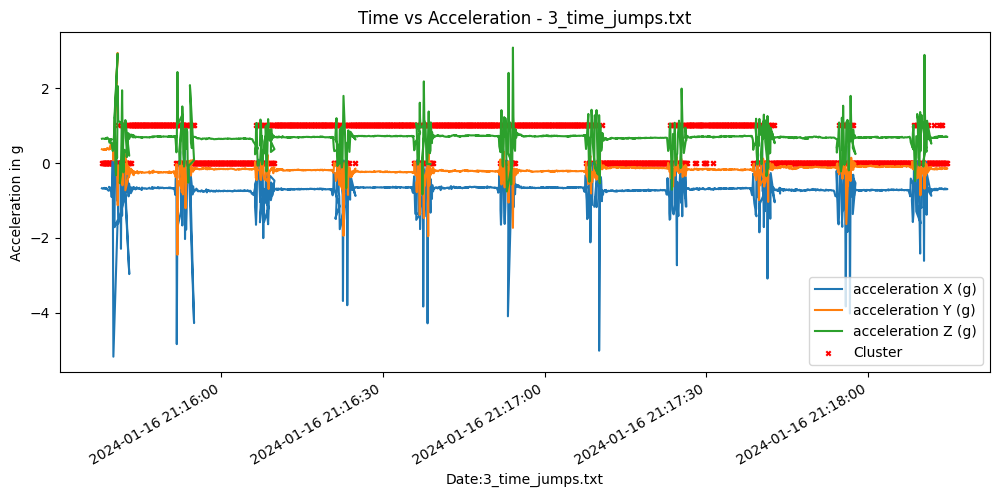

In [34]:

for filename, df in dfs.items():
    

    print(f"Plotting data from {filename}...")

    plt.figure(figsize=(12, 5))

    print(f"Plotting data from {filename}...")

    # 绘制每个加速度分量

    plt.plot(df['Time'], df['acc_X(g)'], label='acceleration X (g)')
    plt.plot(df['Time'], df['acc_Y(g)'], label='acceleration Y (g)')
    plt.plot(df['Time'], df['acc_Z(g)'], label='acceleration Z (g)')
    #plt.plot(df['Time'], df['ang_X(g)'], label='angular_velocity X (g)')
    #plt.plot(df['Time'], df['ang_Y(g)'], label='angular_velocity Y (g)')
    #plt.plot(df['Time'], df['ang_Z(g)'], label='angular_velocity Z (g)')
    plt.scatter(df['Time'], df['Cluster'], label='Cluster', s=10, marker='x', color='red')

    print(f"Plotting data from {filename}...")

    # 格式化图表
    plt.xlabel('Date:' + filename)
    plt.ylabel('Acceleration in g')
    plt.title(f'Time vs Acceleration - {filename}')
    plt.legend()
    plt.grid(False)

    print(f"Plotting data from {filename}...")

    # 改进日期格式化
    plt.gcf().autofmt_xdate()
    myFmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
    plt.gca().xaxis.set_major_formatter(myFmt)

    plt.show()


In [35]:
import joblib

# 假设你的模型名为 model
# 保存模型
joblib.dump(model, 'model_3_time_jumps.pkl')


['model_3_time_jumps.pkl']